<h1>Sentiment Analysis of Real-time Flipkart Product Reviews</h1>

<b>Objective</b><br>
The objective of this project is to classify customer reviews as positive or negative and understand the pain points of customers who write negative reviews. By analyzing the sentiment of reviews, we aim to gain insights into product features that contribute to customer satisfaction or dissatisfaction.

In [10]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
#Loading the Dataset

    # Badminton Dataset
df = pd.read_csv('reviews_badminton\data.csv')
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [12]:
#Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [13]:
#Handling Nan Values


df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [18]:
# Group the DataFrame by 'Ratings' and find the mode of 'Review text' for each rating category
mode_text_by_rating = df.groupby('Ratings')['Review text'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Fill NaN values in 'Review text' column with the mode text for each rating category
for rating, mode_text in mode_text_by_rating.items():
    df.loc[df['Ratings'] == rating, 'Review text'] = df.loc[df['Ratings'] == rating, 'Review text'].fillna(mode_text)

# Display the DataFrame after filling NaN values
print(df[['Review text', 'Ratings']].tail())


                       Review text  Ratings
8513                 GoodREAD MORE        5
8514  Quality is not goodREAD MORE        2
8515                 GoodREAD MORE        4
8516             Not goodREAD MORE        1
8517                 GoodREAD MORE        4


In [19]:
df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          0
Ratings              0
dtype: int64

In [26]:
# Unique Values available in Ratings Col.

df['Ratings'].unique()

array([4, 1, 3, 5, 2], dtype=int64)

In [27]:
# Value count of Ratings col.

df['Ratings'].value_counts(normalize=True)

Ratings
5    0.596384
4    0.204978
1    0.090279
3    0.072200
2    0.036159
Name: proportion, dtype: float64

<Axes: xlabel='Ratings', ylabel='count'>

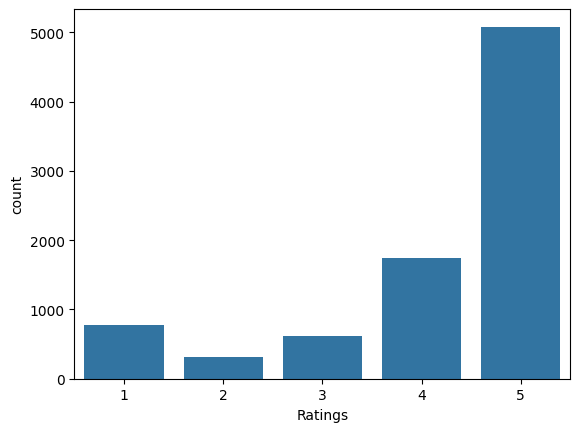

In [28]:
sns.countplot(x='Ratings',data=df)

In [29]:
# Output sentiment labels

# Define threshold for positive/negative ratings
threshold = 4

# Create sentiment labels
df['Ratings'] = df['Ratings'].apply(lambda x: 'Positive' if x >= threshold else 'Negative')

df['Ratings']

0       Positive
1       Negative
2       Negative
3       Negative
4       Negative
          ...   
8513    Positive
8514    Negative
8515    Positive
8516    Negative
8517    Positive
Name: Ratings, Length: 8518, dtype: object

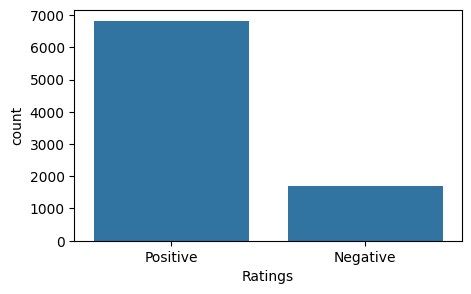

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3)) 
sns.countplot(x='Ratings', data=df)
plt.show()

In [44]:
# Remove 'READ MORE' from 'Review' column
df['Review text'] = df['Review text'].str.replace('READ MORE', '')

<h3>Identifying Input and Output variables</h3>

In [45]:
# Input - X

X = df['Review text']

X.shape

(8518,)

In [46]:
# Output - Y

y = df['Ratings']

y.shape

(8518,)

<h3>Split the data into train and test</h3>

In [47]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)


print("X_train shape :", X_train.shape, y_train.shape)
print("X_test shape :", X_test.shape, y_test.shape)

print("\ny_train shape :", y_train.shape)
print("y_test shape :", y_test.shape)

X_train shape : (6388,) (6388,)
X_test shape : (2130,) (2130,)

y_train shape : (6388,)
y_test shape : (2130,)


<h3>Data Preprocessing & Cleaning on (X_train Data & X_test Data)</h3>

In [48]:
# importing Libraries

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Instantiate the WordNetLemmatizer
lemma = WordNetLemmatizer()



In [49]:
# Text Cleaning: Remove special characters, punctuation, stopwords, and convert text to lowercase

def preprocess(data):
    
    # removes special characters
    sentence = re.sub("[^a-zA-Z]"," ",data)
    
    # converts words to lowercase
    sentence = sentence.lower()
    
    # tokenization
    sentence = sentence.split()
    
    #removes the stop words
    sentence = [word for word in sentence if word not in stopwords.words('english')]
    
    # can apply stem or lemm
    # applying lemmatization
    sentence = [lemma.lemmatize(word) for word in sentence]
    
    sentence=  " ".join(sentence)
    
    return sentence

In [50]:
X_train

6528                    flipkart assured always the best😁
6       BEST PURCHASE It is a good quality and is more...
4804                                                 Good
783                                                 Super
3083                                                 Nice
                              ...                        
4373                                            Excellent
7891                                        Good product.
4859                                            Excellent
3264                                            Very good
2732    Low quality product, one shuttle starts tearin...
Name: Review text, Length: 6388, dtype: object

<h4>Preprocessing</h4>

In [53]:
# Preprocessing On train data

X_train = X_train.apply(preprocess)

X_train

6528                         flipkart assured always best
6       best purchase good quality durable average shu...
4804                                                 good
783                                                 super
3083                                                 nice
                              ...                        
4373                                            excellent
7891                                         good product
4859                                            excellent
3264                                                 good
2732    low quality product one shuttle start tearing ...
Name: Review text, Length: 6388, dtype: object

In [54]:
# Preprocessing On test data

X_test = X_test.apply(preprocess)

X_test

526                                                  good
1315                                             original
5743                                         nice product
1526    using mavis since year would given star star c...
7037                                         best product
                              ...                        
1520                             bad good average product
6220                                         nice product
5489                                         good quality
4123                                                 nice
7961                        please rate mach product good
Name: Review text, Length: 2130, dtype: object

<h4>Convert the categorical column 'cat_column' to a numerical column</h4>

In [55]:
# Importing Library
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate a CountVectorizer object.
vect = CountVectorizer()

In [58]:
# X_train

X_train_num = vect.fit_transform(X_train)

X_train_num.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [66]:
# X_test

X_test_num = vect.transform(X_test)

X_test_num.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

<h3>Model Building</h3>

In [67]:
# Importing Library
from sklearn.naive_bayes import MultinomialNB

nb_model= MultinomialNB()

nb_model.fit(X_train_num,y_train)

MultinomialNB()

<h3>Evaluation of Model</h3>

In [71]:
# Importing Libraries
from sklearn.metrics import accuracy_score, confusion_matrix

# Predicting on the training data
y_train_pred = nb_model.predict(X_train_num)

# Calculating the accuracy score on the training data
train_score = accuracy_score(y_train, y_train_pred)

# Predicting on the test data
y_pred = nb_model.predict(X_test_num)

# Calculating the accuracy score on the test data
test_score = accuracy_score(y_pred, y_test)

# Printing the accuracy scores
print("Train Accuracy Score:", train_score)
print("Test Accuracy Score:", test_score)


Train Accuracy Score: 0.9020037570444583
Test Accuracy Score: 0.888262910798122


<h3>Confusion Matrix</h3>

In [74]:
confusion_matrix(y_train, y_train_pred)

array([[ 742,  525],
       [ 101, 5020]], dtype=int64)

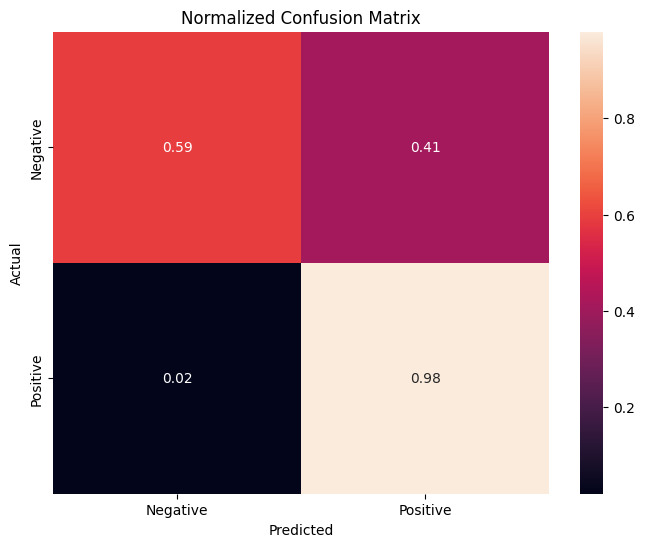

In [73]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Calculate the row-wise sum of the confusion matrix
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Calculate the normalized confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Normalized Confusion Matrix')
plt.show()


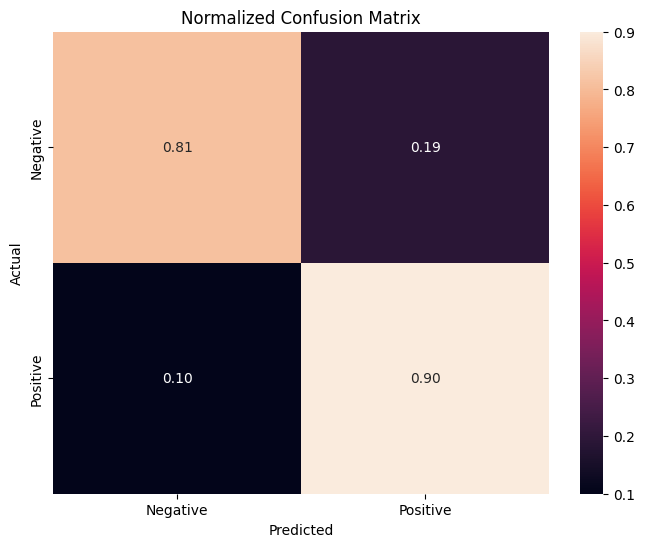

In [75]:
# Calculate the confusion matrix
cm = confusion_matrix(y_pred, y_test)

# Calculate the row-wise sum of the confusion matrix
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Calculate the normalized confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Normalized Confusion Matrix')
plt.show()

<h2>Creating Pipeline to find the best model</h2>

In [77]:
import warnings

warnings.filterwarnings('ignore')

In [78]:
import joblib
from joblib import Memory
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

In [79]:
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [80]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#from sklearn.ensemble import RandomForestClassifier

In [83]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import joblib
from joblib import Memory
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

# Define a custom scorer with pos_label='Positive' for F1-score
f1_scorer = make_scorer(f1_score, pos_label='Positive')

# Define pipelines for different algorithms
pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory),
    'knn': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', KNeighborsClassifier())
    ], memory=memory),
    'svc': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', SVC())
    ], memory=memory),
    #'random_forest': Pipeline([
        #('vectorization', CountVectorizer()),
        #('classifier', RandomForestClassifier())
    #], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features': [1000, 1500, 2000, 5000],
            'classifier__alpha': [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features': [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features': [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ],
    'knn': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features': [1000, 1500, 2000, 5000],
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__weights': ['uniform', 'distance']
        }
    ],
    'svc': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features': [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf'],
            'classifier__gamma': ['scale', 'auto']
        }
    ],
    #'random_forest': [
        #{
            #'vectorization': [CountVectorizer(), TfidfVectorizer()],
            #'vectorization__max_features': [1000, 1500, 2000, 5000],
            #'classifier__n_estimators': [50, 100, 200],
            #'classifier__max_depth': [None, 5, 10],
            #'classifier__min_samples_split': [2, 5, 10],
            #'classifier__min_samples_leaf': [1, 2, 4],
            #'classifier__bootstrap': [True, False]
        #}
    #]
}

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*" * 20, algo, "*" * 20)
    
    # Set max fits for Random Forest
    max_fits = 300 if algo == 'random_forest' else None
    
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=2,
                               scoring=f1_scorer,
                               return_train_score=True,
                               verbose=1
                               )

    %time grid_search.fit(X_train, y_train)

    best_models[algo] = grid_search.best_estimator_

    train_score = grid_search.best_score_
    test_score = grid_search.score(X_test, y_test)
    print('Train Score:', train_score)
    print('Test Score:', test_score)

******************** naive_bayes ********************
Fitting 2 folds for each of 8 candidates, totalling 16 fits
CPU times: total: 9.05 s
Wall time: 1min 17s
Train Score: 0.9339846027475087
Test Score: 0.939150401836969
******************** decision_tree ********************
Fitting 2 folds for each of 24 candidates, totalling 48 fits
CPU times: total: 19.9 s
Wall time: 27 s
Train Score: 0.9332732784291777
Test Score: 0.9367088607594937
******************** logistic_regression ********************
Fitting 2 folds for each of 72 candidates, totalling 144 fits
CPU times: total: 3min 16s
Wall time: 3min 26s
Train Score: 0.9319593064645131
Test Score: 0.9296617779108052
******************** knn ********************
Fitting 2 folds for each of 48 candidates, totalling 96 fits
CPU times: total: 2min 10s
Wall time: 2min 18s
Train Score: 0.9293945351982561
Test Score: 0.912013075456279
******************** svc ********************
Fitting 2 folds for each of 96 candidates, totalling 192 fits


In [84]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=2000)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', TfidfVectorizer(max_features=5000)),
                ('classifier', DecisionTreeClassifier(max_depth=10))])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=2000)),
                ('classifier',
                 LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.5,
                                    penalty='elasticnet', solver='saga'))])

knn
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', TfidfVectorizer(max_features=2000)),
                ('classifier', KNeighborsClassifier(n_neighbors=7))])

svc
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization'

In [87]:
import os
from sklearn import metrics

for name, model in best_models.items():
    print("*"*20, name, "*"*20)
    
    joblib.dump(model, f'best_models/{name}.pkl')
    model = joblib.load(f'best_models/{name}.pkl')
    
    # Predict labels for the test data
    %time y_test_pred = model.predict(X_test)
    
    # Calculate F1 score
    f1 = metrics.f1_score(y_test, y_test_pred, pos_label='Positive')
    
    # Calculate accuracy score
    accuracy = metrics.accuracy_score(y_test, y_test_pred)
    
    # Calculate train score
    train_score = model.score(X_train, y_train)
    
    # Calculate test score
    test_score = model.score(X_test, y_test)
    
    print("Accuracy Score (Test Data):", accuracy)
    print("F1 Score (Test Data):", f1)
    print("Train Score:", train_score)
    print("Test Score:", test_score)
    print("Model Size:", os.path.getsize(f'best_models/{name}.pkl'), "Bytes")

******************** naive_bayes ********************
CPU times: total: 46.9 ms
Wall time: 536 ms
Accuracy Score (Test Data): 0.9004694835680751
F1 Score (Test Data): 0.939150401836969
Train Score: 0.9088916718847839
Test Score: 0.9004694835680751
Model Size: 131351 Bytes
******************** decision_tree ********************
CPU times: total: 62.5 ms
Wall time: 867 ms
Accuracy Score (Test Data): 0.8943661971830986
F1 Score (Test Data): 0.9367088607594937
Train Score: 0.9126487163431434
Test Score: 0.8943661971830986
Model Size: 118093 Bytes
******************** logistic_regression ********************
CPU times: total: 31.2 ms
Wall time: 71.7 ms
Accuracy Score (Test Data): 0.8896713615023474
F1 Score (Test Data): 0.9296617779108052
Train Score: 0.9178146524733876
Test Score: 0.8896713615023474
Model Size: 83578 Bytes
******************** knn ********************
CPU times: total: 1.05 s
Wall time: 4.06 s
Accuracy Score (Test Data): 0.8483568075117371
F1 Score (Test Data): 0.912013075